### 1. Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
path = 'C:/Users/hnguy/OneDrive/Documents/Achievement 6'

In [5]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'ratings_data_cleaned.csv'))

### 2. Data Cleaning

In [6]:
df.columns

Index(['Company/Creator', 'Specific Bean Origin', 'REF', 'Review Date',
       'Cocoa Percent', 'Company Location', 'Rating', 'Broad Bean Origin'],
      dtype='object')

In [7]:
df.head(20)

,Company/Creator,Specific Bean Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru
5,A. Morin,Carenero,1315,2014,0.70,France,2.75,Venezuela
6,A. Morin,Cuba,1315,2014,0.70,France,3.50,Cuba
7,A. Morin,Sur del Lago,1315,2014,0.70,France,3.50,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,0.70,France,3.75,Venezuela
9,A. Morin,Pablino,1319,2014,0.70,France,4.00,Peru


In [8]:
df.shape

(1795, 8)

In [9]:
df.isnull().sum()

Company/Creator          0
Specific Bean Origin     0
REF                      0
Review Date              0
Cocoa Percent            0
Company Location         0
Rating                   0
Broad Bean Origin       74
dtype: int64

In [10]:
dups = df.duplicated()

In [11]:
dups.shape # No dups

(1795,)

C:\Users\hnguy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cocoa Percent', ylabel='Density'>

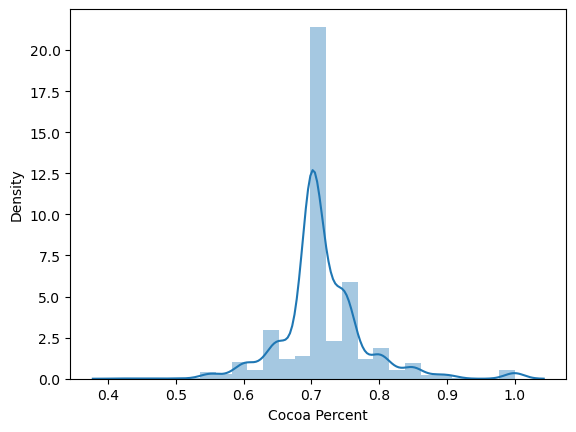

In [12]:
sns.distplot(df['Cocoa Percent'], bins=25) # Shows extreme values

In [13]:
df['Cocoa Percent'].mean() # Check the mean

0.7170027855153318

In [14]:
df['Cocoa Percent'].median() # Check the median

0.7

In [15]:
df['Cocoa Percent'].max() # Check the max

1.0

C:\Users\hnguy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

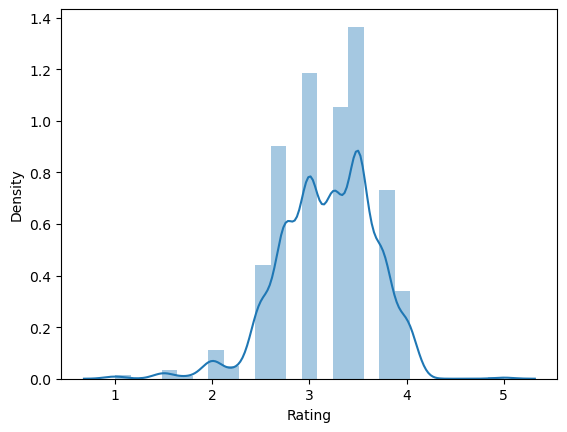

In [16]:
sns.distplot(df['Rating'], bins=25) # Shows extreme values

In [18]:
df['Rating'].mean() # Check the mean

3.185933147632312

In [19]:
df['Rating'].median() # Check the median

3.25

In [21]:
df['Rating'].max() # Check the max

5.0

### 3. Data Prep for Regression Analysis

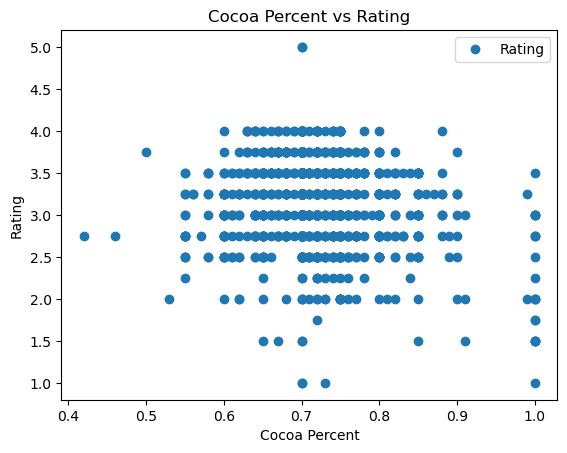

In [22]:
df.plot(x = 'Cocoa Percent', y='Rating',style='o') # The style option creates a scatterplot
plt.title('Cocoa Percent vs Rating')  
plt.xlabel('Cocoa Percent')  
plt.ylabel('Rating')  
plt.show()

### Hypothesis : Chocolate bar with higher cocoa percentage will have higher ratings.

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Cocoa Percent'].values.reshape(-1,1)
y = df['Rating'].values.reshape(-1,1)

In [24]:
X

array([[0.63],
       [0.7 ],
       [0.7 ],
       ...,
       [0.65],
       [0.62],
       [0.65]])

In [25]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [26]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression Analysis

In [27]:
# Create a regression object.

regression = LinearRegression()

In [28]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

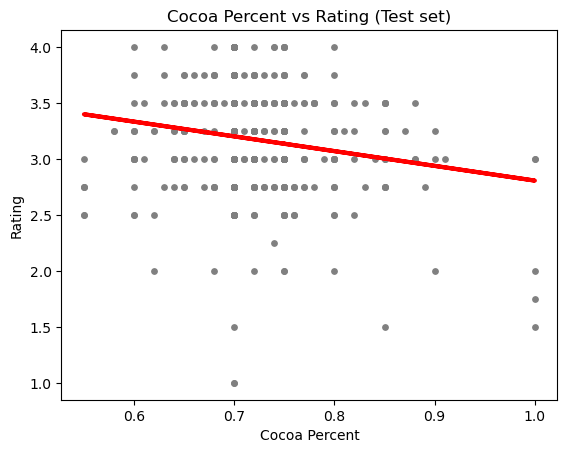

In [30]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs Rating (Test set)')
plot_test.xlabel('Cocoa Percent')
plot_test.ylabel('Rating')
plot_test.show()

The line does not fit well with the data since there are many data points that are far away from it.

In [31]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [32]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.31614192]]
Mean squared error:  0.20955355353948135
R2 score:  0.018023691778551565


In [33]:
y_predicted

array([[3.13539077],
       [3.17487503],
       [3.20119787],
       [3.20119787],
       [3.06958367],
       [3.39861915],
       [3.20119787],
       [3.13539077],
       [3.25384354],
       [3.26700496],
       [3.28016638],
       [3.20119787],
       [3.26700496],
       [3.20119787],
       [3.13539077],
       [3.06958367],
       [3.00377658],
       [3.17487503],
       [3.20119787],
       [3.20119787],
       [3.20119787],
       [3.16171361],
       [3.39861915],
       [2.80635529],
       [3.33281206],
       [3.13539077],
       [3.13539077],
       [3.2275207 ],
       [3.20119787],
       [3.2275207 ],
       [3.17487503],
       [3.20119787],
       [3.20119787],
       [3.20119787],
       [3.13539077],
       [3.20119787],
       [3.17487503],
       [3.28016638],
       [3.17487503],
       [3.20119787],
       [3.13539077],
       [3.26700496],
       [3.20119787],
       [3.39861915],
       [3.20119787],
       [3.33281206],
       [3.10906793],
       [3.135

In [34]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.50,3.135391
1,2.75,3.174875
2,2.50,3.201198
3,3.25,3.201198
4,3.25,3.069584
5,2.75,3.398619
6,3.50,3.201198
7,2.50,3.135391
8,3.50,3.253844
9,3.50,3.267005


In [35]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [36]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [37]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.31614192]]
Mean squared error:  0.22771898839684368
R2 score:  0.029912878654747233


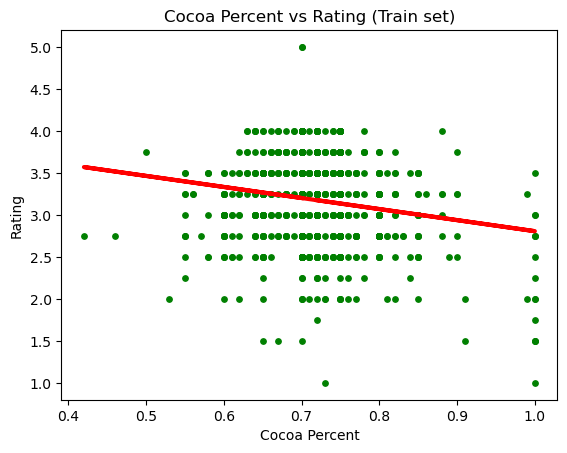

In [38]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs Rating (Train set)')
plot_test.xlabel('Cocoa Percent')
plot_test.ylabel('Rating')
plot_test.show()

The model only fits the training set only slightly better than the test set. For both models, the R2 score is very low, which shows the the model is a poor fit and the relationship of the data variables is not purely linear.